**Artificial Neural Network to predict Match-winning Team**

Importing all necessary Packages and Libraries

In [1]:
import tensorflow as tensorfloww
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
import matplotlib.pyplot as plt
from google.colab import files
import io
from warnings import filterwarnings
filterwarnings("ignore")

Loading the Data-set

In [2]:
uploaded = files.upload()

Saving IPL Matches 2008-2020.csv to IPL Matches 2008-2020.csv


Converting the file to .csv format

In [3]:
df = pd.read_csv(io.BytesIO(uploaded['IPL Matches 2008-2020.csv']))

Viewing the Data's properties

In [4]:
print(df.shape)

(816, 17)


In [5]:
print(df.dtypes)

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object


Viewing the first and last **5** sanples from Dataset

In [6]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


Finding the **Pearson** co-relation coefficient

In [7]:
print(df.corr(method = 'pearson'))

                     id  neutral_venue  result_margin
id             1.000000      -0.292042      -0.010501
neutral_venue -0.292042       1.000000      -0.006445
result_margin -0.010501      -0.006445       1.000000


**Data Preparation and Data Cleaning :** 

In [8]:
df.loc[(df.toss_decision == 'bat'),'toss_decision'] = 1
df.loc[(df.toss_decision == 'field'),'toss_decision'] = 0

In [9]:
print(df['toss_decision'])
df['toss_decision'] = df['toss_decision'].astype(int)

0      0
1      1
2      1
3      1
4      1
      ..
811    0
812    0
813    0
814    1
815    1
Name: toss_decision, Length: 816, dtype: object


In [10]:
df.loc[(df.result == 'runs'),'result'] = 1
df.loc[(df.result == 'wickets'),'result'] = 0
df.loc[(df.result == 'tie'),'result'] = 1
df.loc[(df.eliminator == 'N'),'eliminator'] = 0
df.loc[(df.eliminator == 'Y'),'eliminator'] = 1

In [11]:
print(df['result'])

0      1
1      1
2      0
3      0
4      0
      ..
811    1
812    1
813    0
814    1
815    0
Name: result, Length: 816, dtype: object


In [12]:
print(df['eliminator'])

0      0
1      0
2      0
3      0
4      0
      ..
811    1
812    0
813    0
814    0
815    0
Name: eliminator, Length: 816, dtype: object


In [13]:
df = df.drop(labels = ['method'],axis=1)

In [14]:
df = df.dropna()

In [15]:
print(df.shape)

(786, 16)


In [16]:
df['eliminator']  = df['eliminator'].astype(int)
df['result'] = df['result'].astype(int)

In [17]:
print(df['team1'].unique())
print(df['team2'].unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals']


In [18]:
df.loc[(df.team1 == 'Royal Challengers Bangalore'),'team1'] = 1
df.loc[(df.team2 == 'Royal Challengers Bangalore'),'team2'] = 1
df.loc[(df.winner == 'Royal Challengers Bangalore'),'winner'] = 1
df.loc[(df.toss_winner == 'Royal Challengers Bangalore'),'toss_winner'] = 1
df.loc[(df.team1 == 'Kings XI Punjab'),'team1'] = 2
df.loc[(df.team2 == 'Kings XI Punjab'),'team2'] = 2
df.loc[(df.winner == 'Kings XI Punjab'),'winner'] = 2
df.loc[(df.toss_winner == 'Kings XI Punjab'),'toss_winner'] = 2
df.loc[(df.team1 == 'Delhi Daredevils'),'team1'] = 3
df.loc[(df.team2 == 'Delhi Daredevils'),'team2'] = 3
df.loc[(df.winner == 'Delhi Daredevils'),'winner'] = 3
df.loc[(df.toss_winner == 'Delhi Daredevils'),'toss_winner'] = 3
df.loc[(df.team1 == 'Mumbai Indians'),'team1'] = 4
df.loc[(df.team2 == 'Mumbai Indians'),'team2'] = 4
df.loc[(df.winner == 'Mumbai Indians'),'winner'] = 4
df.loc[(df.toss_winner == 'Mumbai Indians'),'toss_winner'] = 4
df.loc[(df.team1 == 'Kolkata Knight Riders'),'team1'] = 5
df.loc[(df.team2 == 'Kolkata Knight Riders'),'team2'] = 5
df.loc[(df.winner == 'Kolkata Knight Riders'),'winner'] = 5
df.loc[(df.toss_winner == 'Kolkata Knight Riders'),'toss_winner'] = 5
df.loc[(df.team1 == 'Rajasthan Royals'),'team1'] = 6
df.loc[(df.team2 == 'Rajasthan Royals'),'team2'] = 6
df.loc[(df.winner == 'Rajasthan Royals'),'winner'] = 6
df.loc[(df.toss_winner == 'Rajasthan Royals'),'toss_winner'] = 6
df.loc[(df.team1 == 'Deccan Chargers'),'team1'] = 7
df.loc[(df.team2 == 'Deccan Chargers'),'team2'] = 7
df.loc[(df.winner == 'Deccan Chargers'),'winner'] = 7
df.loc[(df.toss_winner == 'Deccan Chargers'),'toss_winner'] = 7
df.loc[(df.team1 == 'Chennai Super Kings'),'team1'] = 8
df.loc[(df.team2 == 'Chennai Super Kings'),'team2'] = 8
df.loc[(df.winner == 'Chennai Super Kings'),'winner'] = 8
df.loc[(df.toss_winner == 'Chennai Super Kings'),'toss_winner'] = 8
df.loc[(df.team1 == 'Kochi Tuskers Kerala'),'team1'] = 9
df.loc[(df.team2 == 'Kochi Tuskers Kerala'),'team2'] = 9
df.loc[(df.winner == 'Kochi Tuskers Kerala'),'winner'] = 9
df.loc[(df.toss_winner == 'Kochi Tuskers Kerala'),'toss_winner'] = 9
df.loc[(df.team1 == 'Pune Warriors'),'team1'] = 10
df.loc[(df.team2 == 'Pune Warriors'),'team2'] = 10
df.loc[(df.winner == 'Pune Warriors'),'winner'] = 10
df.loc[(df.toss_winner == 'Pune Warriors'),'toss_winner'] = 10
df.loc[(df.team1 == 'Sunrisers Hyderabad'),'team1'] = 11
df.loc[(df.team2 == 'Sunrisers Hyderabad'),'team2'] = 11
df.loc[(df.winner == 'Sunrisers Hyderabad'),'winner'] = 11
df.loc[(df.toss_winner == 'Sunrisers Hyderabad'),'toss_winner'] = 11
df.loc[(df.team1 == 'Gujarat Lions'),'team1'] = 12
df.loc[(df.team2 == 'Gujarat Lions'),'team2'] = 12
df.loc[(df.winner == 'Gujarat Lions'),'winner'] = 12
df.loc[(df.toss_winner == 'Gujarat Lions'),'toss_winner'] = 12
df.loc[(df.team1 == 'Rising Pune Supergiants'),'team1'] = 13
df.loc[(df.team2 == 'Rising Pune Supergiants'),'team2'] = 13
df.loc[(df.winner == 'Rising Pune Supergiants'),'winner'] = 13
df.loc[(df.toss_winner == 'Rising Pune Supergiants'),'toss_winner'] = 13
df.loc[(df.team1 == 'Rising Pune Supergiant'),'team1'] = 13
df.loc[(df.team2 == 'Rising Pune Supergiant'),'team2'] = 13
df.loc[(df.winner == 'Rising Pune Supergiant'),'winner'] = 13
df.loc[(df.toss_winner == 'Rising Pune Supergiant'),'toss_winner'] = 13
df.loc[(df.team1 == 'Delhi Capitals'),'team1'] = 3
df.loc[(df.team2 == 'Delhi Capitals'),'team2'] = 3
df.loc[(df.winner == 'Delhi Capitals'),'winner'] = 3
df.loc[(df.toss_winner == 'Delhi Capitals'),'toss_winner'] = 3

In [19]:
df['team1']  = df['team1'].astype(int)
df['team2']  = df['team2'].astype(int)
df['winner']  = df['winner'].astype(int)
df['toss_winner']  = df['toss_winner'].astype(int)

In [20]:
print(df.dtypes)

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1                int64
team2                int64
toss_winner          int64
toss_decision        int64
winner               int64
result               int64
result_margin      float64
eliminator           int64
umpire1             object
umpire2             object
dtype: object


In [21]:
df = df.drop(labels = ['id','date','city','player_of_match','venue','umpire1','umpire2'],axis=1);

In [22]:
print(df.dtypes)

neutral_venue      int64
team1              int64
team2              int64
toss_winner        int64
toss_decision      int64
winner             int64
result             int64
result_margin    float64
eliminator         int64
dtype: object


In [23]:
df['result_margin'] = df['result_margin'].astype(int)

**Scatter Plot of Toss_winner vs Match_winner :**
Gives the Details that how the outcome of Toss affects the outcome of the Match.

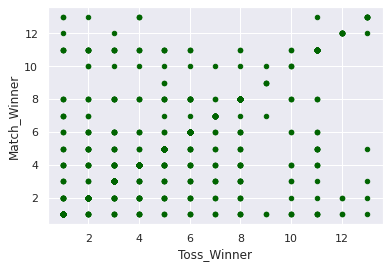

In [24]:
graph = df.plot(kind='scatter', x='toss_winner', y='winner', color = 'darkgreen');
graph.set_xlabel("Toss_Winner");
graph.set_ylabel("Match_Winner");

**Scatter Plot of a Unique Team vs Match_winner :**
Gives the Details of Match's outcome When 2 Unique teams faced each other.

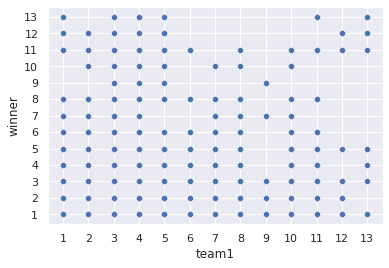

In [26]:
plt.xticks(np.arange(0,14,1))
plt.yticks(np.arange(0,14,1))
sns.scatterplot(df["team1"],df["winner"],ci = False);

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 815
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   neutral_venue      786 non-null    int64
 1   team1              786 non-null    int64
 2   team2              786 non-null    int64
 3   toss_winner        786 non-null    int64
 4   toss_decision      786 non-null    int64
 5   winner             786 non-null    int64
 6   result             786 non-null    int64
 7   result_margin      786 non-null    int64
 8   eliminator         786 non-null    int64
 9   Won Batting first  786 non-null    int64
dtypes: int64(10)
memory usage: 67.5 KB


<Figure size 720x720 with 0 Axes>

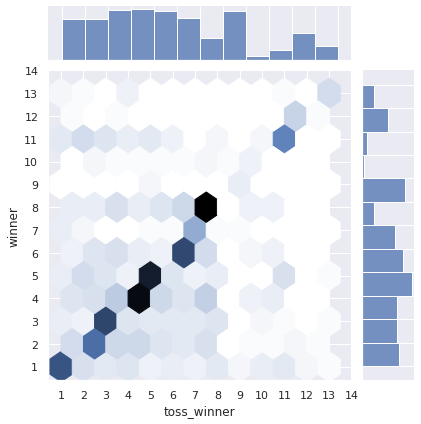

In [66]:
plt.figure(figsize = (10,10));
sns.jointplot(kind='hex',x=df['toss_winner'],y=df['winner']);
plt.xticks(np.arange(1,15,1));
plt.yticks(np.arange(1,15,1));
plt.show();

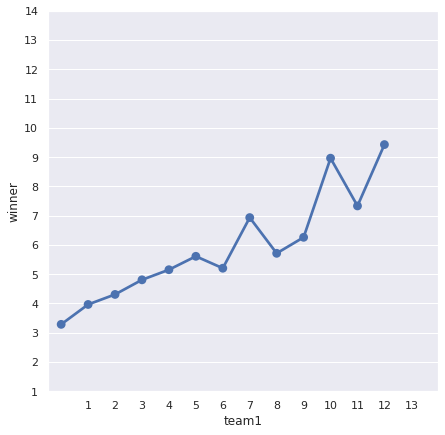

In [82]:
plt.figure(figsize = (7,7));
sns.pointplot(df['team1'],df['winner'],ci=None);
plt.xticks(np.arange(1,15,1));
plt.yticks(np.arange(1,15,1));
plt.show();

In [56]:
df.corr(method = 'pearson')

,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,Won Batting first
neutral_venue,1.000000,-0.070207,-0.066427,-0.061277,0.131670,-0.082217,0.015937,0.007910,NaN,NaN
team1,-0.070207,1.000000,-0.108442,0.418542,0.098867,0.483721,-0.002990,-0.052701,NaN,NaN
team2,-0.066427,-0.108442,1.000000,0.433966,-0.027213,0.387133,-0.043761,-0.054797,NaN,NaN
toss_winner,-0.061277,0.418542,0.433966,1.000000,0.061339,0.422852,-0.037225,-0.054127,NaN,NaN
toss_decision,0.131670,0.098867,-0.027213,0.061339,1.000000,0.019302,0.020218,-0.028201,NaN,NaN
winner,-0.082217,0.483721,0.387133,0.422852,0.019302,1.000000,0.002429,-0.025908,NaN,NaN
result,0.015937,-0.002990,-0.043761,-0.037225,0.020218,0.002429,1.000000,0.549009,NaN,NaN
result_margin,0.007910,-0.052701,-0.054797,-0.054127,-0.028201,-0.025908,0.549009,1.000000,NaN,NaN
eliminator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Won Batting first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.head()

,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator
0,0,1,5,1,0,5,1,140,0
1,0,2,8,8,1,8,1,33,0
2,0,3,6,6,1,3,0,9,0
3,0,4,1,4,1,1,0,5,0
4,0,5,7,7,1,5,0,5,0


In [30]:
print(df.shape)

(786, 9)


**Developing the Artificial Neural Network  :**


**ANN - I** : In this Network we predict the Winner of the match using the ***available*** dataset.

In [31]:
model = Sequential()
model.add(Dense(45, activation='linear', input_shape=(8,)))
model.add(Dense(20, activation='linear'))
model.add(Dense(21, activation='relu'))
model.add(Dense(20, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                405       
                                                                 
 dense_1 (Dense)             (None, 20)                920       
                                                                 
 dense_2 (Dense)             (None, 21)                441       
                                                                 
 dense_3 (Dense)             (None, 20)                440       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,227
Trainable params: 2,227
Non-trainable params: 0
_________________________________________________________________


**Test Train data splitting**

In [32]:
X = df[['neutral_venue','team1','team2','toss_winner','toss_decision',
'result','result_margin','eliminator']].values      
y = df['winner'].values  
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 40)
y_train = tensorfloww.convert_to_tensor(y_train)
y_test = tensorfloww.convert_to_tensor(y_test)

In [33]:
X_train = tensorfloww.convert_to_tensor(X_train)
X_test = tensorfloww.convert_to_tensor(X_test)

**Model Compilation :**

In [34]:
model.compile(loss='hinge',optimizer=SGD(),metrics=['accuracy'])

**Network Training :**

In [35]:
model.fit(X_train,y_train,epochs=5,batch_size=1)

Epoch 1/5
589/589 [==============================] - 2s 2ms/step - loss: 0.0089 - accuracy: 0.1070
Epoch 2/5
589/589 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1087
Epoch 3/5
589/589 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1087
Epoch 4/5
589/589 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1087
Epoch 5/5
589/589 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1087


Evaluating the Network model's score.

In [36]:
score = model.evaluate(X_test,y_test,verbose = 0)
print("Test-loss = ",score[0])
print("Test-accuracy = ",score[1])

Test-loss =  0.0
Test-accuracy =  0.11675126850605011


**Checking Output for a Case :**

In [37]:
Team_1 = 5
Team_2 = 1
result = model.predict([[1,Team_1,Team_2,Team_2,0,0,3,0]])
if((Team_1-result)<(Team_2-result)):
  print("Team_ 1 Won the game")
else:
  print("Team_2 Won the game")

Team_2 Won the game


**Creating an array for adding a new Field into exsisting dataset**

In [38]:
initializer = []
for i in range (0,len(df)):
  initializer.append(0)

**Adding new field**

In [39]:
df['Won Batting first'] = initializer
print(df.dtypes)

neutral_venue        int64
team1                int64
team2                int64
toss_winner          int64
toss_decision        int64
winner               int64
result               int64
result_margin        int64
eliminator           int64
Won Batting first    int64
dtype: object


**Updating the newly added field :**

In [40]:
for index,row in df.iterrows():
  if row['toss_winner'] == row['winner'] and row['toss_decision'] == 1:
    df['Won Batting first'] = 1

In [41]:
df.head()

,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,Won Batting first
0,0,1,5,1,0,5,1,140,0,1
1,0,2,8,8,1,8,1,33,0,1
2,0,3,6,6,1,3,0,9,0,1
3,0,4,1,4,1,1,0,5,0,1
4,0,5,7,7,1,5,0,5,0,1


**Train-test split for Artificial Neural Network - II**

In [42]:
X = df[['team1', 'team2','Won Batting first']].values
y = df['winner'].values
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=50)
X_train = tensorfloww.convert_to_tensor(X_train)
X_test = tensorfloww.convert_to_tensor(X_test)
y_train = tensorfloww.convert_to_tensor(y_train)
y_test = tensorfloww.convert_to_tensor(y_test)

**Artificial Neural Network - II**
In this Network we predict the Winner of the match using the ***updated*** dataset.

In [43]:
model  = Sequential()
model.add(Dense(50, activation='linear', input_shape=(3,)))
model.add(Dense(34,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                200       
                                                                 
 dense_6 (Dense)             (None, 34)                1734      
                                                                 
 dense_7 (Dense)             (None, 1)                 35        
                                                                 
Total params: 1,969
Trainable params: 1,969
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss = 'hinge', optimizer = Adam(), metrics = ['accuracy'])

In [45]:
x_validate = X_train
y_validate = y_train
early_stopping = EarlyStopping()
model.fit(X_train,y_train,epochs = 5,batch_size = 1,callbacks=[early_stopping],validation_data=(x_validate, y_validate))

Epoch 1/5
589/589 [==============================] - 3s 5ms/step - loss: 2.1011e-04 - accuracy: 0.1087 - val_loss: 0.0000e+00 - val_accuracy: 0.1087
Epoch 2/5
589/589 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1087 - val_loss: 0.0000e+00 - val_accuracy: 0.1087


In [46]:
score = model.evaluate(X_test,y_test,verbose = 0)
print("Test-loss = ",score[0])
print("Test-accuracy = ",score[1])

Test-loss =  0.0
Test-accuracy =  0.11675126850605011


In [47]:
Team_1 = 12
Team_2 = 11
result = model.predict([[Team_1,Team_2,0]])
if((Team_1-result) < (Team_2-result)):
  print("Team_ 1 Won the game")
else:
  print("Team_2 Won the game")

Team_2 Won the game
